## Learning Objectives

Implement 2 different machine learning algorithms
*   Stochastic Gradient Descent
*   ID3 Decision Tree


In [ ]:
# import all required libraries
import pandas as pd
import math
from csv import reader
import matplotlib.pyplot as plt
import random as rand

In [ ]:
#mount Google Drive to Notebook
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
# Assume that the data files are in the following folder -- THIS WILL BE USED BY THE TA
basePath = "/content/drive/My Drive/Colab Notebooks/Artificial Intelligence/Data/"


#Stochastic Gradient Descent


In [ ]:
# Data file name variables
train = basePath + "gd-train.dat"
test = basePath + "gd-test.dat"

# Read the training and testing data files
training = []
testing = []

#open file in read
with open(train, 'r') as training_file:
        #read data in separated by tabs
        data = reader(training_file, delimiter='\t')
        #for each row in the data
        for row in data:
          #if row is not true
          if not row:
            #continue 
            continue
           #append the row to training list
          training.append(row)

#open file in read
with open(test, 'r') as testing_file:
        #read data in separated by tabs
        data = reader(testing_file, delimiter='\t')
        #for each row in the data
        for row in data:
          #if row is not true
          if not row:
            continue
          testing.append(row)

training_data = training[1:]
testing_data = testing[1:]

# Activation Function - implement Sigmoid
def activation_function(h):
    # given 'h' compute and return 'z' based on the activation function implemented
  return 1 / (1 + math.exp(-h))

# Train the model using the given training dataset and the learning rate
# return the "weights" learnt for the perceptron - include the weight assocaited with bias as the last entry
def train(train_data, learning_rate=0.5):
    # initialize weights to 0
    weights = []
    #append +1 0 to weight 
    for i in range(13+1):
      weights.append(0) 

    # go through each training data instance
    for data in range(len(train_data)):
        # get 'x' as one multi-variate data instance and 'y' as the ground truth class label
        train_data[data] = [int(train_data[data][i]) for i in range(len(train_data[data]))]
        x = train_data[data]
        #x.append(1) #append bias
        #print(x)
        y = train_data[data][-1]
        #print(y)
        # obtain h(x)
        h = sum([a * b for a, b in zip(x, weights)])
        # call the activation function with 'h' as parameter to obtain 'z'
        z = activation_function(h)
        # update all weights individually using learning_rate, (y-z), and the corresponding 'x'
        error = y-z
        weights[-1] = weights[-1] + learning_rate * error 
        for i in range(len(weights)-1):
          weights[i] = (weights[i] + (learning_rate)* (error))
        # return the final learnt weights
    return weights
    
# Test the model (weights learnt) using the given test dataset
# return the accuracy value
def test(test_data, weights, threshold):
    # go through each testing data instance
    count = 0 
    for data in range(len(test_data)):
        # get 'x' as one multi-variate data instance and 'y' as the ground truth class label
        test_data[data] = [int(test_data[data][i]) for i in range(len(test_data[data]))]
        x = test_data[data]
        #x.append(1) #aapend bias
        #print(x)
        y = test_data[data][-1]
        #print("y",y)
        #print("row ",test_data[data])
        # obtain h(x)
        h = sum([a * b for a, b in zip(x, weights)])
        # call the activation function with 'h' as parameter to obtain 'z'
        z = activation_function(h)
        # use 'threshold' to convert 'z' to either 0 or 1 so as to match to the ground truth binary labels
        predicted = predict(threshold,z)
        #print("predicted", predicted, z)
        # compare thresholded 'z' with 'y' to calculate the positive and negative instances for calculating accuracy
        if y == predicted:
            count+=1
    # return the accuracy value for the given test dataset
    return count/len(test_data)*100
  
# Gradient Descent function
def gradient_descent(df_train, df_test, learning_rate=0.5, threshold=0.5):
    # call the train function to train the model and obtain the weights
    weights = train(df_train, learning_rate)
    #print(weights)
    # call the test function with the training dataset to obtain the training accuracy
    train_accuracy = test(df_train, weights, threshold)
    # call the test function with the testing dataset to obtain the testing accuracy
    test_accuracy = test(df_test, weights, threshold)
    # return (trainAccuracy, testAccuracy)
    return (train_accuracy, test_accuracy)

# Threshold of 0.5 will be used to classify the instance for the test. If the value is >= 0.5, classify as 1 or else 0.
def predict(threshold, z):
  if z > threshold:
    return 1
  else:
    return 0

In [ ]:
learning_rate = 0
threshold = 0.5
lr_train = []
acc_train = []
lr_test = []
acc_test = []

# Main algorithm loop
while learning_rate <=1:
    # Loop through all the different learning rates [0.05, 1]
    learning_rate+=.05

    # For each learning rate selected, call the gradient descent function to obtain the train and test accuracy values
    training_accuracy, testing_accuracy = gradient_descent(training_data, testing_data, learning_rate, threshold)
    lr_train.append(learning_rate)
    acc_train.append(training_accuracy)
    lr_test.append(learning_rate)
    acc_test.append(testing_accuracy)

    # Print both the accuracy values as "Accuracy for LR of 0.1 on Training set = x %" OR "Accuracy for LR of 0.1 on Testing set = x %"
    print("Accuracy for Learning Rate, ", "{:.2f}".format(learning_rate), "results in Training Data ", training_accuracy)
    print("Accuracy for Learning Rate, ", "{:.2f}".format(learning_rate), "results in Testing Data ", testing_accuracy)


Accuracy for Learning Rate,  0.05 results in Training Data  68.0
Accuracy for Learning Rate,  0.05 results in Testing Data  72.25
Accuracy for Learning Rate,  0.10 results in Training Data  68.0
Accuracy for Learning Rate,  0.10 results in Testing Data  72.25
Accuracy for Learning Rate,  0.15 results in Training Data  68.0
Accuracy for Learning Rate,  0.15 results in Testing Data  72.25
Accuracy for Learning Rate,  0.20 results in Training Data  68.0
Accuracy for Learning Rate,  0.20 results in Testing Data  72.25
Accuracy for Learning Rate,  0.25 results in Training Data  68.0
Accuracy for Learning Rate,  0.25 results in Testing Data  72.25
Accuracy for Learning Rate,  0.30 results in Training Data  68.0
Accuracy for Learning Rate,  0.30 results in Testing Data  72.25
Accuracy for Learning Rate,  0.35 results in Training Data  68.0
Accuracy for Learning Rate,  0.35 results in Testing Data  72.25
Accuracy for Learning Rate,  0.40 results in Training Data  68.0
Accuracy for Learning Rat

#ID3 Decision Tree

Sources used to create ID3 <br>
ID3 from Scratch Towards Data Science : https://towardsdatascience.com/id3-decision-tree-classifier-from-scratch-in-python-b38ef145fd90

Tutorials Decision Tree : https://github.com/random-forests/tutorials/blob/master/decision_tree.py

Machine Learning with Python: Decision Trees in Python: https://www.python-course.eu/Decision_Trees.php


ID3_From_Scratch : https://github.com/bergr7/ID3_From_Scratch/blob/main/ID3.py

In [ ]:
def InfoGain(data):
  total_entropy = entropy(data)
  conditional_entropy = 0
  #n = total number of rows
  n = len(data)

  #for v in values_in_given_feature:
  for v in range(len(data[0])-1):
    for i in range(len(data)-1):
      #list_of_values.append(data[i][v])
      #valuesUnique = np.unique(list_of_values)        
      #m = number of rows belonging to v
      m = len(data)
      #sub_data for v
      subdata = data[i][v]
      entropy(sub_data)
      conditional_entropy += m(entropy/n)

  return total_entropy - conditional_entropy


#Records a 'column number' and a'column value' 
#match function  is used to comparethe feature value in an example to the feature value stored in the question.
class Question:
    def __init__(self, column, value):
        self.column = column
        self.value = value
    def match(self, example):
        val = example[self.column]
        if is_numeric(val):
            return val >= self.value
        else:
            return val == self.value
    def __repr__(self):
        condition = "="
        if is_numeric(self.value):
            condition = ">="
        return "%s %s %s:" % (
            header[self.column], condition, str(self.value))
        
        
# Keeps track number of timesit appears in the rows from the training data that reach this leaf in dict form.        
class Leaf:
    def __init__(self, rows, question):
        self.predictions = class_counts(rows)
        self.question = question

# keeps reference to the question, and to the two child nodes.
class Decision_Node:
    def __init__(self,
                 question,
                 true_branch,
                 false_branch):
        self.question = question
        self.true_branch = true_branch
        self.false_branch = false_branch

def entropy(data):
  #n = total number of rows in data
  n = len(data)
  entropy_val = 0
  count_0 = 0
  count_1 = 0
  for i in range(len(data)):
    if data[i][-1] == 0:
      count_0 += 1
    else:
      count_i += 1
  #for c in classes(yes/no):
  for c in range(len(data)):
    if data[i][-1] == 0:
      #m = number of rows belonging to class c
      m = count_0
      p = m/n
      entropy_val += 0 if m==0 else(-p*np.log2(p))
    else:
      #m = number of rows belonging to class c
      m = count_1
      p = m/n
      entropy_val += 0 if m==0 else(-p*np.log2(p))
  return entropy_val

  #is node/leaf a number or not
def is_numeric(value):
  return isinstance(value, int) or isinstance(value, float)

#counts the number of each type of example in a dataset
def class_counts(rows):
  #Value output will be in some form like so {'0': 288, '1': 108}
  counts = {} 
  for row in rows:
    # in our dataset format, the label is always the last column
    label = row[-1]
    #if label is not in our dict of counts
    if label not in counts:
        #set to 0 to reset value 
        counts[label] = 0
    #add 1 to label
    counts[label] += 1
  #return counts
  return counts

#aid in entropy
def score(rows):
  #return counts of data 
  counts = class_counts(rows)
  entropy = 1
  #for each label in counts
  for lbl in counts:
    #set the probability from value / # of rows in data
      prob_of_lbl = counts[lbl] / float(len(rows))
      #subtract from entropy
      entropy -= prob_of_lbl**2
  #return the entropy
  return entropy

#info_gain measure the uncertainty of the starting node, minus the weighted impurity of two child nodes
def info_gain(left, right, current_uncertainty):
  #get probability 
  p = float(len(left)) / (len(left) + len(right))
  #return the info
  return current_uncertainty - p * score(left) - (1 - p) * score(right)

#partition the data by question
def partition(rows, question):
  true_rows, false_rows = [], []
  #For each row in the dataset
  for row in rows:
    #check if it matches the question
    if question.match(row):
      #add it to 'true rows
      true_rows.append(row)
    #otherwise
    else:
      #add it to 'false rows
      false_rows.append(row)
  #return the true and false rows
  return true_rows, false_rows

#partitioning the data on each of the unique attribute, calculate the information gain, and return the question that produces the highest gain.
def find_best_split(rows):
  #inition way to keep track of best info gain
  best_gain = 0 
  best_question = None  
  current_uncertainty = score(rows)
  #get number of columns
  n_features = len(rows[0]) - 1
  #in each of the feature/attributes  
  for col in range(n_features): 
    #get the unique values in the column
    values = set([row[col] for row in rows])
    #for each value in the values
    for val in values:  
      #get the question
      question = Question(col, val)
      #partition - split the data
      true_rows, false_rows = partition(rows, question)
      #skip the split if you cannot split
      if len(true_rows) == 0 or len(false_rows) == 0:
        continue
      #get the info gain from the split
      gain = info_gain(true_rows, false_rows, current_uncertainty)
      #if the current gain is bigger or equal to the best gain we have
      if gain >= best_gain:
        #set the new best gain and best question to be our current
        best_gain, best_question = gain, question
  #return the best gain and question
  return best_gain, best_question

#build our tree
def build_tree(rows):
  #partitioning the data on each of the unique attribute, calculate the information gain, and return the question that produces the highest gain.
  # Find the best attribute to split by calculating the maximum information gain from the attributes remaining by calculating the entropy
  gain, question = find_best_split(rows)
  # If you reach a leaf node in the decision tree and have no examples left or the examples are equally split among multiple classes
  if gain == 0:
      return Leaf(rows, question)
  # If you reached a leaf node but still have examples that belong to different classes (there are no remaining attributes to be split) If we reach here, we have found a useful feature / value to partition on
  true_rows, false_rows = partition(rows, question)
  #Recursively build the true branch.
  true_branch = build_tree(true_rows)
  # Recursively build the false branch.
  false_branch = build_tree(false_rows)
  # Return a Question node which is the tree with the best feature / value as well as the branches 
  return Decision_Node(question, true_branch, false_branch)

#print our tree
def print_tree(node, spacing=""):
  # Base case: we've reached a leaf
  if isinstance(node, Leaf):
      print (spacing + "attr", print_leaf(node.predictions), end = ' ')
      return
  # Print the question at this node
  print (spacing + str(node.question), end = ' ')
  print (' ')
  # Call this function recursively on the true branch
  print_tree(node.true_branch, spacing + " ")
  print (' ')
  # Call this function recursively on the false branch
  print_tree(node.false_branch, spacing + " ")


def classify(row, node):
  # Base case: we've reached a leaf
  if isinstance(node, Leaf):
      return node.predictions
  #if the question matches then
  if node.question.match(row):
    #recuresively call the classify following true branch
    return classify(row, node.true_branch)
  else:
    #recursively call classify following false branch
    return classify(row, node.false_branch)

def print_leaf(counts):
  total = sum(counts.values()) * 1.0
  probability = {}
  for label in counts.keys():
      #probability[label] = str(int(counts[label] / total * 100)) + "%"
      probability[label] = int(counts[label])
  return probability

#print our accurancy
def print_accuracy(rows, tree):
  count = 0
  length = len(rows)
  #for row in data 
  for row in rows:
    #get the results
    result = classify(row, tree)
    #set left value to be 0
    left = result.get('0')
    #if left is None
    if left is None:
      #est to 0
      left=0
    #get right value to be 1
    right = result.get('1')
    #if right is None
    if right is None:
      #set to 0
      right=0
    # if left is bigger than right
    if left>right:
      #set results to be 0
      result=0
    #otherwise right is bigger than left
    else:
      #set restuls to be 1
      result=1
    #if result is not equal to the class predictor
    if result != int(row[-1]):
      #add 1 to our count
      count=count+1
  #return accuracy 
  return ((length-count)/length * 100)

In [ ]:
# Data file name variables
train = basePath + 'id3-train.dat'
test = basePath + 'id3-test.dat'



# Following is the base code structure. Feel free to change the code structure as you see fit, maybe even create more functions.
# Data file name variables
train = basePath + "id3-train.dat"
test = basePath + "id3-test.dat"

#test with weather data

class Node(object):
  def __init__(self, parent=None):
    self.parent = parent
    self.children = []
    self.splitAttribute = None
    self.splitAttributeValue = None
    self.count = None
    self.cls = None
    
# Read the first line in the training data file, to get the number of attributes
# Read the training and testing data files
training = []
testing = []

#open file in read
with open(train, 'r') as training_file:
        #read data in separated by tabs
        data = reader(training_file, delimiter='\t')
        #for each row in the data
        for row in data:
          #if row is not true
          if not row:
            #continue 
            continue
           #append the row to training list
          training.append(row)

#open file in read
with open(test, 'r') as testing_file:
        #read data in separated by tabs
        data = reader(testing_file, delimiter='\t')
        #for each row in the data
        for row in data:
          #if row is not true
          if not row:
            continue
          testing.append(row)
header = training[0]
training_data = training[1:]
testing_data = testing[1:]

# Read all the training instances and the ground truth class labels.
# Create the decision tree by implementing the ID3 algorithm. Pseudocode provided above.
# Print the tree in the example format mentioned.
tree = build_tree(training_data)
print_tree(tree)

#build test tree
testing_tree = build_tree(testing_data)


attr5 = 0:  
 attr6 = 0:  
  attr2 = 0:  
   attr1 = 1:  
    attr4 = 0:  
     attr3 = 0:  
      attr {'1': 1, '0': 14}  
      attr {'0': 10}  
     attr {'0': 30}  
    attr4 = 1:  
     attr3 = 1:  
      attr {'0': 13, '1': 1}  
      attr {'0': 12, '1': 1}  
     attr3 = 0:  
      attr {'0': 8, '1': 1}  
      attr {'1': 3, '0': 9}  
   attr4 = 0:  
    attr3 = 0:  
     attr {'0': 25}  
     attr1 = 0:  
      attr {'0': 11}  
      attr {'0': 16, '1': 2}  
    attr1 = 1:  
     attr3 = 0:  
      attr {'1': 4, '0': 8}  
      attr {'0': 13, '1': 4}  
     attr3 = 0:  
      attr {'0': 9, '1': 1}  
      attr {'0': 15, '1': 3}  
  attr4 = 1:  
   attr2 = 0:  
    attr1 = 0:  
     attr3 = 1:  
      attr {'0': 11, '1': 1}  
      attr {'0': 15, '1': 3}  
     attr3 = 0:  
      attr {'0': 10, '1': 3}  
      attr {'1': 2, '0': 8}  
    attr1 = 1:  
     attr3 = 0:  
      attr {'0': 8, '1': 1}  
      attr {'0': 4, '1': 4}  
     attr3 = 0:  
      attr {'1': 9, '0': 2}  
    

In [ ]:
print("Accuracy on the Training data = %f" % (print_accuracy(training_data, tree)))
print("Accuracy on the Testing data = %f" % (print_accuracy(testing_data, testing_tree)))

Accuracy on the Training data = 89.375000
Accuracy on the Testing data = 90.640394


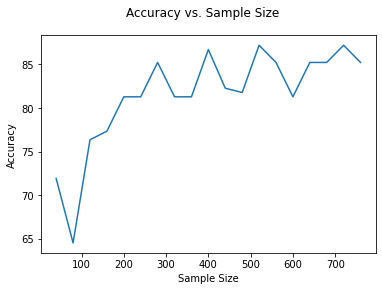

In [ ]:
accuracy = []
sample = []
tree_list = []

length = len(training_data)
x = 40

# For each 'x',
while x < length:
  #get list of random numbers from testing data - 40 
  # Randomly select 'x' instances
  tree_list = rand.sample(training_data,x)
  #build tree
  # Create the ID3 decision tree using those instances
  my_tree = build_tree(tree_list)
  #append accuracy to list
  # Calculate the accuracy of the ID3 tree created on the Test data
  accuracy.append(print_accuracy(testing_data, my_tree))
  #append x to sample
  sample.append(x)
  #add 40 to x
  # Loop through to select the number of instances 'x' in increments of 40
  x+=40

# Plot the learning curve using the accuracy values
plt.plot(sample,accuracy)
# Y-axis will be the accuracy in % on the Test data
plt.ylabel('Accuracy')
# X-axis will be the number of training instances used for creating the tree

plt.xlabel('Sample Size')
plt.suptitle("Accuracy vs. Sample Size")

plt.show()